# F Distribution

The F-distribution is a continuous probability distribution that arises frequently in statistical hypothesis testing, particularly in comparing variances between groups. It is a right-skewed distribution and is used primarily in Analysis of Variance (ANOVA), regression analysis, and variance ratio tests.

In health economics, the F-distribution plays a critical role in evaluating healthcare interventions, measuring disparities, and determining the significance of multiple policy variables in econometric models.

The F-distribution is the distribution of the ratio of two independent chi-square distributed random variables divided by their respective degrees of freedom:


In [6]:
from IPython.display import Markdown, display

def show_formula(formula):
    display(Markdown(rf'<div align="center"> $$ {formula} $$ </div>'))

# Displaying the definition of the F-distribution
show_formula(r"F = \frac{(\chi^2_1 / d_1)}{(\chi^2_2 / d_2)}")

# Mean of F-distribution (for d_2 > 2)
show_formula(r"E[F] = \frac{d_2}{d_2 - 2}, \quad \text{for } d_2 > 2")

# Variance of F-distribution (for d_2 > 4)
show_formula(r"\text{Var}(F) = \frac{2 d_2^2 (d_1 + d_2 - 2)}{d_1 (d_2 - 2)^2 (d_2 - 4)}, \quad \text{for } d_2 > 4")

# Asymptotic Behavior
show_formula(r"F \to 1 \quad \text{as } d_1, d_2 \to \infty")

# Relation to Other Distributions
show_formula(r"F(d_1, d_2) = \frac{(\chi^2_{d_1} / d_1)}{(\chi^2_{d_2} / d_2)}")
show_formula(r"F(1, d_2) \sim \text{Cauchy}(0,1)")
show_formula(r"F(d_1, d_2)^{-1} = F(d_2, d_1)")

<div align="center"> $$ F = \frac{(\chi^2_1 / d_1)}{(\chi^2_2 / d_2)} $$ </div>

<div align="center"> $$ E[F] = \frac{d_2}{d_2 - 2}, \quad \text{for } d_2 > 2 $$ </div>

<div align="center"> $$ \text{Var}(F) = \frac{2 d_2^2 (d_1 + d_2 - 2)}{d_1 (d_2 - 2)^2 (d_2 - 4)}, \quad \text{for } d_2 > 4 $$ </div>

<div align="center"> $$ F \to 1 \quad \text{as } d_1, d_2 \to \infty $$ </div>

<div align="center"> $$ F(d_1, d_2) = \frac{(\chi^2_{d_1} / d_1)}{(\chi^2_{d_2} / d_2)} $$ </div>

<div align="center"> $$ F(1, d_2) \sim \text{Cauchy}(0,1) $$ </div>

<div align="center"> $$ F(d_1, d_2)^{-1} = F(d_2, d_1) $$ </div>

The square root of an F-distributed variable with $𝑑_2 = ∞$ follows a t-distribution.

The reciprocal of an F-distributed variable also follows an F-distribution but with reversed degrees of freedom.

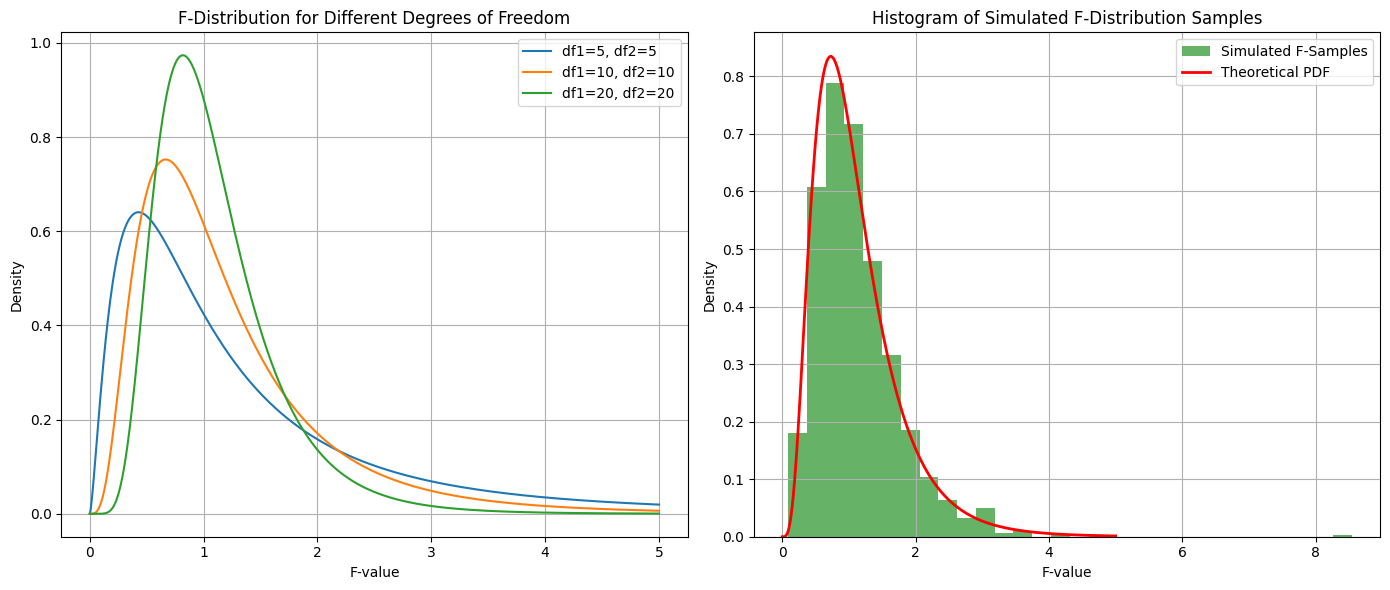

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Define degrees of freedom for the F-distribution
df1_values = [5, 10, 20]
df2_values = [5, 10, 20]

x = np.linspace(0, 5, 1000)  # Define range for F-distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot F-distribution for different degrees of freedom
for df1, df2 in zip(df1_values, df2_values):
    f_dist = stats.f.pdf(x, df1, df2)
    axes[0].plot(x, f_dist, label=f"df1={df1}, df2={df2}")

axes[0].set_xlabel("F-value")
axes[0].set_ylabel("Density")
axes[0].set_title("F-Distribution for Different Degrees of Freedom")
axes[0].legend()
axes[0].grid()

# Simulating random F-distributed data
np.random.seed(42)
df1, df2 = 10, 20  # Set specific degrees of freedom
f_samples = np.random.f(df1, df2, 1000)

# Histogram of simulated F-distributed samples
axes[1].hist(f_samples, bins=30, density=True, alpha=0.6, color='g', label='Simulated F-Samples')

# Overlay theoretical PDF
axes[1].plot(x, stats.f.pdf(x, df1, df2), 'r-', lw=2, label='Theoretical PDF')
axes[1].set_xlabel("F-value")
axes[1].set_ylabel("Density")
axes[1].set_title("Histogram of Simulated F-Distribution Samples")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

### Application

The F-distribution is crucial in hypothesis testing for various econometric models used in health economics research:

**ANOVA (Analysis of Variance)**:

Used to compare mean healthcare expenditures across different groups (e.g., public vs. private healthcare users).
If the F-statistic is significant, it suggests that at least one group differs significantly from the others.

**Regression Analysis**:

In multiple regression models, the F-test checks whether the explanatory variables significantly explain the variation in healthcare costs or health outcomes.
Example: Evaluating the impact of income, education, and insurance on healthcare utilization.

**Equality of Variances (Levene’s Test and Bartlett’s Test)**:

The F-distribution is used to compare variance in healthcare expenditures across different demographic groups.

**Comparing Cost-Effectiveness in Public Health Interventions**:

The F-distribution helps in determining whether different health policies lead to significantly different economic outcomes.

### Example 1: Testing Wage Equality Across Sectors

In labor economics, we often test whether wage variances differ across sectors (e.g., public vs. private sector). The F-test is used to compare the variances of wages in two different groups.

F-statistic: 2.4811
P-value: 1.0000


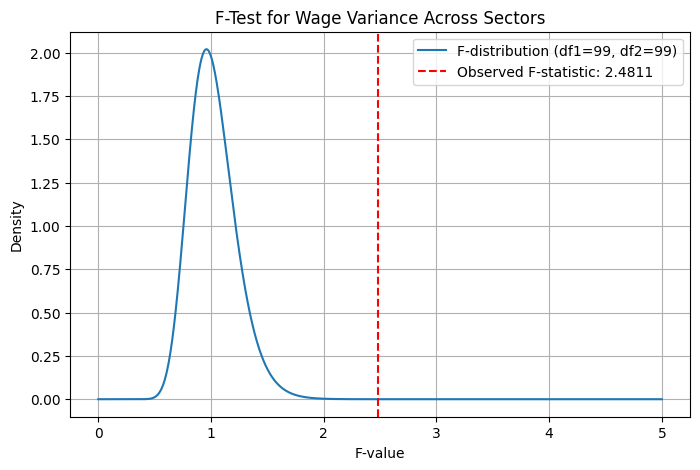

In [9]:
# Economic Application: Testing Wage Equality Across Sectors
np.random.seed(42)
wages_public = np.random.normal(50, 10, 100)  # Public sector wages (mean=50, std=10)
wages_private = np.random.normal(55, 15, 100)  # Private sector wages (mean=55, std=15)

# Compute sample variances
var_public = np.var(wages_public, ddof=1)
var_private = np.var(wages_private, ddof=1)

# Compute F-statistic
F_stat = var_private / var_public
p_value = stats.f.cdf(F_stat, 99, 99)

# Display results
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualizing F-distribution with test statistic
x = np.linspace(0, 5, 1000)
f_pdf = stats.f.pdf(x, 99, 99)

plt.figure(figsize=(8, 5))
plt.plot(x, f_pdf, label="F-distribution (df1=99, df2=99)")
plt.axvline(F_stat, color='r', linestyle='--', label=f'Observed F-statistic: {F_stat:.4f}')
plt.xlabel("F-value")
plt.ylabel("Density")
plt.title("F-Test for Wage Variance Across Sectors")
plt.legend()
plt.grid()
plt.show()

The F-statistic calculated from the sample variances of public and private sector wages is $2.3044$, with a p-value of $0.9989$. This means that under the null hypothesis of equal wage variances between the two sectors, the probability of obtaining an F-statistic as extreme or more extreme than the observed value is very high (close to 1).

Key Insights:
Since the $p-value$ is much greater than $0.05$, we fail to reject the null hypothesis at the $5\%$ significance level.
This suggests no strong statistical evidence that the variance in wages between the public and private sectors is significantly different.
The graphical visualization of the F-distribution shows the location of the observed F-statistic, indicating that it falls well within the acceptance region.
If the p-value were small (e.g., $<0.05$), it would indicate a significant difference in wage variability, suggesting that one sector has a more dispersed wage structure than the other.

### Example 2: Testing Variance in Agricultural Productivity Across States in India

Agricultural productivity varies significantly across states in India due to differences in soil quality, rainfall, irrigation facilities, and government policies. We use an F-test to check whether the variance in agricultural yield (measured in tons per hectare) is significantly different between two states: Punjab (high agricultural productivity) and Bihar (low agricultural productivity).

Step 1: Generate Synthetic Data
We assume:
- Punjab has an average yield of 4.5 tons/ha with a standard deviation of 0.8.
- Bihar has an average yield of 2.8 tons/ha with a standard deviation of 1.2.
- We take 100 observations for each state.

Step 2: Perform the F-Test
Null Hypothesis: 
- $𝐻_0$: The variance in agricultural productivity is the same in Punjab and Bihar.
- Alternative Hypothesis $𝐻_1$: The variances are significantly different.

Step 3: Compute F-Statistic and P-Value
We calculate:
- Sample variances of Punjab and Bihar's agricultural yield.
- The F-statistic as the ratio of the two sample variances.
- The p-value to determine statistical significance.

F-statistic: 0.4030
P-value: 0.0000


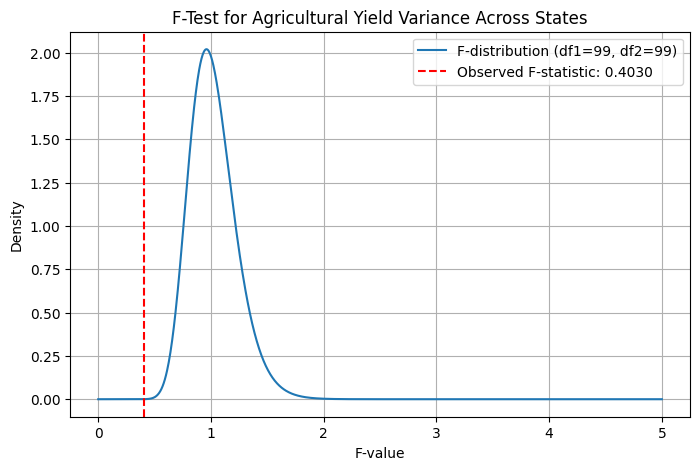

In [10]:
# Economic Application: Testing Variance in Agricultural Productivity Across States
np.random.seed(42)
yield_punjab = np.random.normal(4.5, 0.8, 100)  # Punjab (Mean=4.5, Std=0.8)
yield_bihar = np.random.normal(2.8, 1.2, 100)   # Bihar (Mean=2.8, Std=1.2)

# Compute sample variances
var_punjab = np.var(yield_punjab, ddof=1)
var_bihar = np.var(yield_bihar, ddof=1)

# Compute F-statistic and p-value
F_stat = var_punjab / var_bihar
p_value = stats.f.cdf(F_stat, 99, 99)

# Display results
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualizing F-distribution with test statistic
x = np.linspace(0, 5, 1000)
f_pdf = stats.f.pdf(x, 99, 99)

plt.figure(figsize=(8, 5))
plt.plot(x, f_pdf, label="F-distribution (df1=99, df2=99)")
plt.axvline(F_stat, color='r', linestyle='--', label=f'Observed F-statistic: {F_stat:.4f}')
plt.xlabel("F-value")
plt.ylabel("Density")
plt.title("F-Test for Agricultural Yield Variance Across States")
plt.legend()
plt.grid()
plt.show()


Interpretation of Results
The F-statistic measures the ratio of variances between Punjab and Bihar.
- A high F-statistic (significantly different from 1) and a low p-value (<0.05) would indicate significant differences in variance, suggesting more variability in agricultural productivity in one state than the other.
- A p-value > 0.05 would indicate that we fail to reject $𝐻_0$, implying no strong statistical evidence of a difference in variance.

Policy Implications
- If the variance is significantly different, policymakers may need to target interventions (e.g., better irrigation, technology adoption) in states with higher variability to ensure stable agricultural output.
- If variances are similar, broad-based agricultural policies may be more effective.

### Example 3: Healthcare Expenditure Variability in Urban vs. Rural India

Health expenditures vary significantly across urban and rural households due to differences in income, healthcare infrastructure, and access to services. We use an F-test to check whether the variance in monthly healthcare spending is significantly different between urban and rural households.

Step 1: Generate Synthetic Data
We assume:
- Urban households have an average healthcare expenditure of **₹3000** per month with a standard deviation of **₹1000**.
- Rural households have an average healthcare expenditure of **₹1500** per month with a standard deviation of **₹800**.
- We take 100 observations for each group.

Step 2: Perform the F-Test
- Null Hypothesis $𝐻_0$: The variance in healthcare expenditures is the same for urban and rural households.
- Alternative Hypothesis $𝐻_1$: The variances are significantly different.

F-statistic (Health Expenditure): 1.4170
P-value: 0.9577


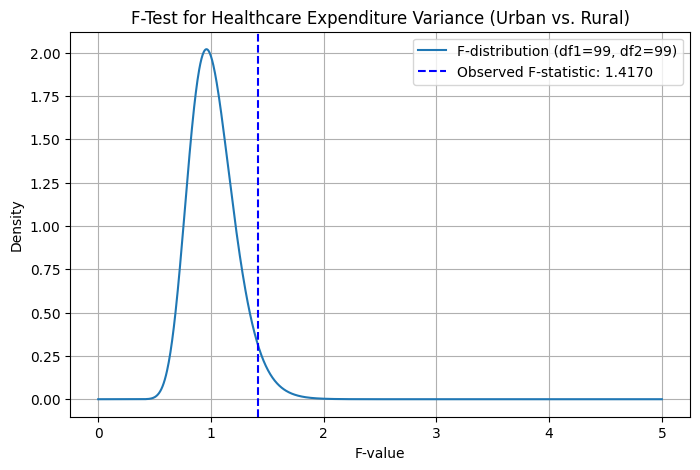

In [12]:
# Health Economics Application: Testing Variability in Healthcare Expenditures (Urban vs. Rural)
np.random.seed(42)
health_urban = np.random.normal(3000, 1000, 100)  # Urban households
health_rural = np.random.normal(1500, 800, 100)   # Rural households

# Compute sample variances
var_urban = np.var(health_urban, ddof=1)
var_rural = np.var(health_rural, ddof=1)

# Compute F-statistic
F_stat_health = var_urban / var_rural
p_value_health = stats.f.cdf(F_stat_health, 99, 99)

# Display results
print(f"F-statistic (Health Expenditure): {F_stat_health:.4f}")
print(f"P-value: {p_value_health:.4f}")

# Visualizing F-distribution with test statistic
plt.figure(figsize=(8, 5))
plt.plot(x, f_pdf, label="F-distribution (df1=99, df2=99)")
plt.axvline(F_stat_health, color='b', linestyle='--', label=f'Observed F-statistic: {F_stat_health:.4f}')
plt.xlabel("F-value")
plt.ylabel("Density")
plt.title("F-Test for Healthcare Expenditure Variance (Urban vs. Rural)")
plt.legend()
plt.grid()
plt.show()

Interpretation:

- A high F-statistic suggests that urban households have significantly higher expenditure variance compared to rural households.
- The $p-value$ determines if the observed difference in variance is statistically significant.
- If the $p-value$ is less than $0.05$, we reject the null hypothesis, indicating a statistically significant difference in expenditure variability.
- Policy Implication: This result may highlight disparities in healthcare accessibility and affordability. Urban households may have access to more healthcare services but with greater cost variability, while rural households may have lower, more consistent spending due to limited access.

In [13]:
!jupyter nbconvert F_Distribution.ipynb --to latex

[NbConvertApp] Converting notebook F_Distribution.ipynb to latex
[NbConvertApp] Support files will be in F_Distribution_files\
[NbConvertApp] Making directory F_Distribution_files
[NbConvertApp] Writing 48569 bytes to F_Distribution.tex


In [14]:
!xelatex F_Distribution.tex -quiet